In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import importlib as il

import itertools as it
import random

import stage_2a_bar_selection as bs
il.reload(bs)

%load_ext ipydex.displaytools
%matplotlib inline

In [15]:
def rotate_img(img, angle, border_value=255):
    height, width = img.shape[:2]

    # Calculate the rotation matrix
    center = (width // 2, height // 2)
    rotation_matrix = cv2.getRotationMatrix2D(center, angle, 1)

    # Apply the rotation to the image
    rotated_image = cv2.warpAffine(img, rotation_matrix, (width, height), borderValue=border_value)
    return rotated_image

In [16]:
vv = {'vmin': 0, 'vmax': 255}

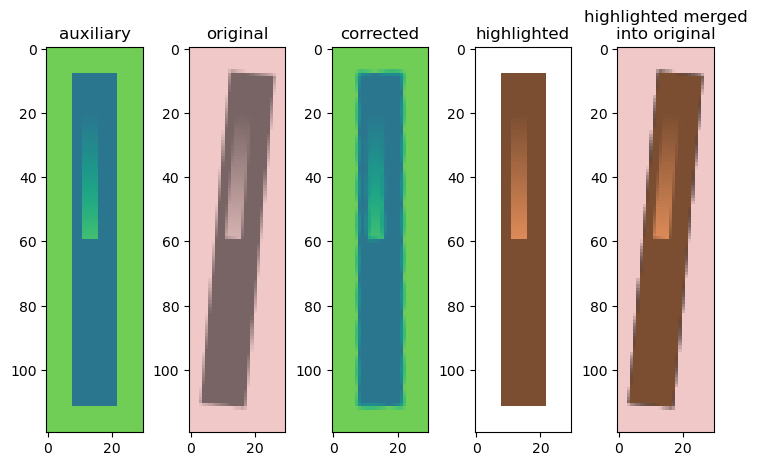

In [164]:
background_value = 200
foreground_value = 100

angle = -5

img_original0 = np.ones((120, 30))*background_value
e = 8
img_original0[e:-e , e:-e] = foreground_value


cell_mask = img_original0 == foreground_value
background_mask = np.logical_not(cell_mask)
# copy



# create the faulty pixels
n1 = 40
n2 = 5

f = 3

line = np.arange(n1)*2
patch = np.repeat(line[:, np.newaxis], n2, axis=1)

img_original0[e + 4*f:e+patch.shape[0] + 4*f, e + f: e + patch.shape[1] + f] += patch


fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5, figsize=(10, 5));
ax1.imshow(img_original0, **vv)
ax1.set_title("auxiliary")

img_original1 = rotate_img(img_original0, angle, border_value=background_value)

img_original1_rgb = np.repeat(img_original1[:, :, np.newaxis], 3, 2)/255

img_original1_rgb[:, : , 0]*= 1.2

ax2.imshow(img_original1_rgb)
ax2.set_title("original")

img_corrected = rotate_img(img_original1, -angle, border_value=background_value)

plt.sca(ax3)
plt.imshow(img_corrected, **vv)
plt.title("corrected")


plt.sca(ax4)

highlighted = np.ones((*img_original0.shape, 4))
highlighted[:, :, :3] = 0

# set alpha for background to zero
# highlighted[background_mask, -1] = 0

from matplotlib import colormaps
cmap_bg = colormaps["viridis"]
cmap_fg = colormaps["copper"]

img_original0_rgba = cmap_bg(img_original0/255)

# highlighted[background_mask, :] = img_original0_rgba[background_mask, :]

highlighted[background_mask, -1] = 0
highlighted[cell_mask, :] = cmap_fg(img_original0/255)[cell_mask, :]

plt.imshow(highlighted)
plt.title("highlighted")


# get the highlight in original orientation
hl_oorientation = rotate_img(highlighted, angle, border_value=background_value/255)

# hl_oorientation[:, :, -1] = plt.Normalize()(hl_oorientation[:, :, -1])

mask = hl_oorientation[:, :, -1:]


merged = img_original1_rgb * (1-mask) + hl_oorientation[:, :, :3]*mask

plt.sca(ax5)
plt.imshow(merged)
plt.title("highlighted merged\ninto original")

plt.subplots_adjust(wspace=-0.3)